In [2]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import string
import os
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

In [3]:
clean_tweet_df = pd.read_csv('./data/clean_tweet.csv')

In [4]:
clean_tweet_df.head(5)

,Unnamed: 0,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,screen_count,followers_count,friends_count,possibly_sensitive,user_mentions,place,place_coord_boundaries
0,0,2021-06-18 17:55:49,"<a href=""http://twitter.com/download/iphone"" r...","🚨Africa is ""in the midst of a full-blown third...","🚨Africa is ""in the midst of a full-blown third...","Sentiment(polarity=0.16666666666666666, subjec...",0.166667,0.188889,en,548,612,ketuesriche,2,551,351,NaN,"['TelGlobalHealth', 'WHOAFRO']",Mass,NaN
1,1,2021-06-18 17:55:59,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Dr Moeti is head of WHO in Africa, and one of ...","Dr Moeti is head of WHO in Africa, and one of ...","Sentiment(polarity=0.13333333333333333, subjec...",0.133333,0.455556,en,195,92,Grid1949,1,66,92,NaN,['globalhlthtwit'],"Edinburgh, Scotland",NaN
2,2,2021-06-18 17:56:07,"<a href=""http://twitter.com/download/iphone"" r...",Thank you @research2note for creating this ama...,Thank you esearch2note for creating this amazi...,"Sentiment(polarity=0.3166666666666667, subject...",0.316667,0.483333,en,2,1,LeeTomlinson8,3,1195,1176,NaN,"['NHSRDForum', 'Research2note', 'NHSRDForum']",NaN,NaN
3,3,2021-06-18 17:56:10,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Former Pfizer VP and Virologist, Dr. Michael Y...","Former Pfizer VP and Virologist, Dr. Michael Y...","Sentiment(polarity=0.08611111111111111, subjec...",0.086111,0.197222,en,1580,899,RIPNY08,1,2666,2704,NaN,['HighWireTalk'],NaN,NaN
4,4,2021-06-18 17:56:20,"<a href=""http://twitter.com/download/android"" ...",I think it’s important that we don’t sell COVA...,I think it’s important that we don’t sell COVA...,"Sentiment(polarity=0.27999999999999997, subjec...",0.280000,0.620000,en,72,20,pash22,1,28250,30819,NaN,['PeterHotez'],United Kingdom,NaN


In [5]:
cleanTweet = clean_tweet_df.drop(clean_tweet_df.columns.difference(['clean_text','polarity']), axis=1)

In [6]:
cleanTweet.head(5)

,clean_text,polarity
0,"🚨Africa is ""in the midst of a full-blown third...",0.166667
1,"Dr Moeti is head of WHO in Africa, and one of ...",0.133333
2,Thank you esearch2note for creating this amazi...,0.316667
3,"Former Pfizer VP and Virologist, Dr. Michael Y...",0.086111
4,I think it’s important that we don’t sell COVA...,0.280000


In [7]:
def text_category(polarity):
    
    if polarity < 0:
        return "Negative"
    elif polarity == 0:
        return "Neutral"
    else:
        return "Positive"

In [8]:
cleanTweet['score'] = cleanTweet['polarity'].apply(text_category)

In [9]:
cleanTweet['score'].unique()

array(['Positive', 'Negative', 'Neutral'], dtype=object)

Text(0.5, 1.0, 'Twitter Sentiment Analysis')

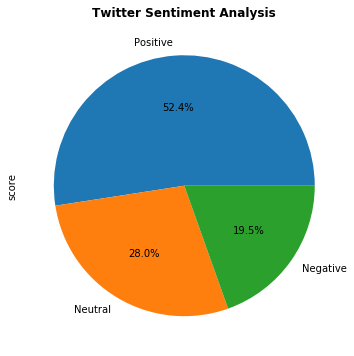

In [10]:
cleanTweet['score'].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize =(7,6))
plt.title('Twitter Sentiment Analysis',  fontweight="bold")

In [11]:
cleanTweet.drop(cleanTweet[cleanTweet['score'] == 'Neutral'].index, inplace = True)

In [12]:
cleanTweet['scoremap']= cleanTweet.score.map({'Positive':1, 'Negative':0})

In [13]:
X = cleanTweet['clean_text']
y = cleanTweet['scoremap']

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [14]:
def N_gram_classifier(X_train, y_train, X_test, n_gram):
    countVect = CountVectorizer( analyzer = 'word', lowercase = True, ngram_range = n_gram)
    X_train = countVect.fit_transform(X_train)
    X_test = countVect.transform(X_test)
    
    clf = SGDClassifier(loss = "hinge", penalty = 'l2')
    clf.fit(X_train,y_train)
    
    prediction = clf.predict(X_test)
    
    return prediction

In [15]:
y_prediction = N_gram_classifier(X_train, y_train, X_test, (3,3))

In [16]:
accuracy_score(y_test, y_prediction)

0.9608843537414966